In [1]:
%%capture
!pip install qiskit qiskit_ibm_runtime

In [21]:
import matplotlib.pyplot as plt
from numpy import pi
import numpy as np

from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, Session

In [3]:
service = QiskitRuntimeService(channel="ibm_quantum", token = "")
backend = service.least_busy(operational=True, simulator=False)
if backend is None:
  raise ValueError("Nenhum backend disponível. Verifique sua conexão com a IBM Quantum.")
else:
  print("backend selecionado:", backend)

backend selecionado: <IBMBackend('ibm_kyiv')>


In [4]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[4])
circuit.cx(qreg_q[4], qreg_q[0])
circuit.cx(qreg_q[4], qreg_q[2])
circuit.cx(qreg_q[4], qreg_q[3])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])

In [5]:
transpiled_circuit = transpile(circuit, backend=backend, optimization_level=3)
transpiled_params = transpiled_circuit.parameters
param_values = {param: np.random.rand() for param in transpiled_params}

with Session(backend=backend) as session:
  sampler_qr = Sampler()
  job = sampler_qr.run([(transpiled_circuit, param_values)])
  result = job.result()

In [19]:
print(transpiled_circuit)

global phase: 0
          ┌──────────┐┌────┐   ┌────────┐                                »
q_3 -> 40 ┤ Rz(-π/2) ├┤ √X ├───┤ Rz(-π) ├────────────────────────────────»
          ├──────────┤├────┤  ┌┴────────┴┐  ┌──────┐   ┌────────┐  ┌───┐ »
q_4 -> 41 ┤ Rz(-π/2) ├┤ √X ├──┤ Rz(-π/2) ├──┤1     ├───┤ Rz(-π) ├──┤ X ├─»
          ├──────────┤├────┤┌─┴──────────┴─┐│  Ecr │┌──┴────────┴─┐├───┴┐»
q_0 -> 42 ┤ Rz(-π/2) ├┤ √X ├┤ Rz(-0.83567) ├┤0     ├┤ Rz(0.73513) ├┤ √X ├»
          ├──────────┤├────┤└──┬────────┬──┘└──────┘└─────────────┘└────┘»
q_2 -> 53 ┤ Rz(-π/2) ├┤ √X ├───┤ Rz(-π) ├────────────────────────────────»
          └───┬─┬────┘└────┘   └────────┘                                »
q_1 -> 97 ────┤M├────────────────────────────────────────────────────────»
              └╥┘                                                        »
     c: 4/═════╩═════════════════════════════════════════════════════════»
               1                                                         »
«        

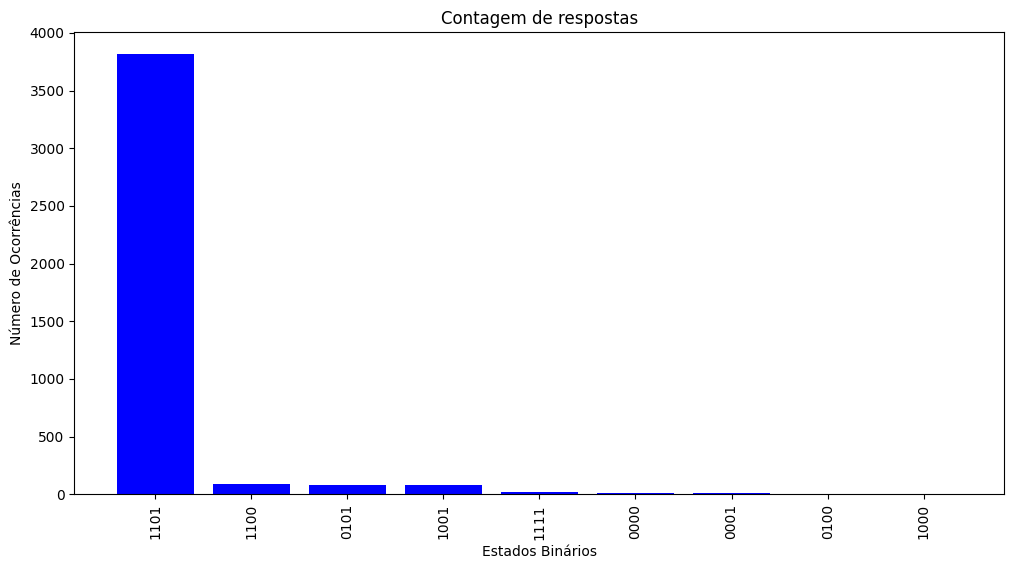

dict_keys(['1101', '1100', '0101', '1001', '1111', '0000', '0001', '0100', '1000'])
dict_values([3815, 89, 79, 77, 15, 8, 7, 4, 2])


In [22]:
counts = job.result()[0].data.c.get_counts()

# Ordenar os estados pela frequência
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))


# Plotar o gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='blue')
plt.xlabel("Estados Binários")
plt.ylabel("Número de Ocorrências")
plt.title("Contagem de respostas")
plt.xticks(rotation=90)
plt.show()
print(sorted_counts.keys())
print(sorted_counts.values())